In [355]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing datasets


In [356]:
#reading the data sets
book=pd.read_csv('Books.csv')
user=pd.read_csv('Users.csv')
rating=pd.read_csv('Ratings.csv')

<ipython-input-356-5b87e7c0b488>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book=pd.read_csv('Books.csv')


In [357]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [358]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


<Axes: >

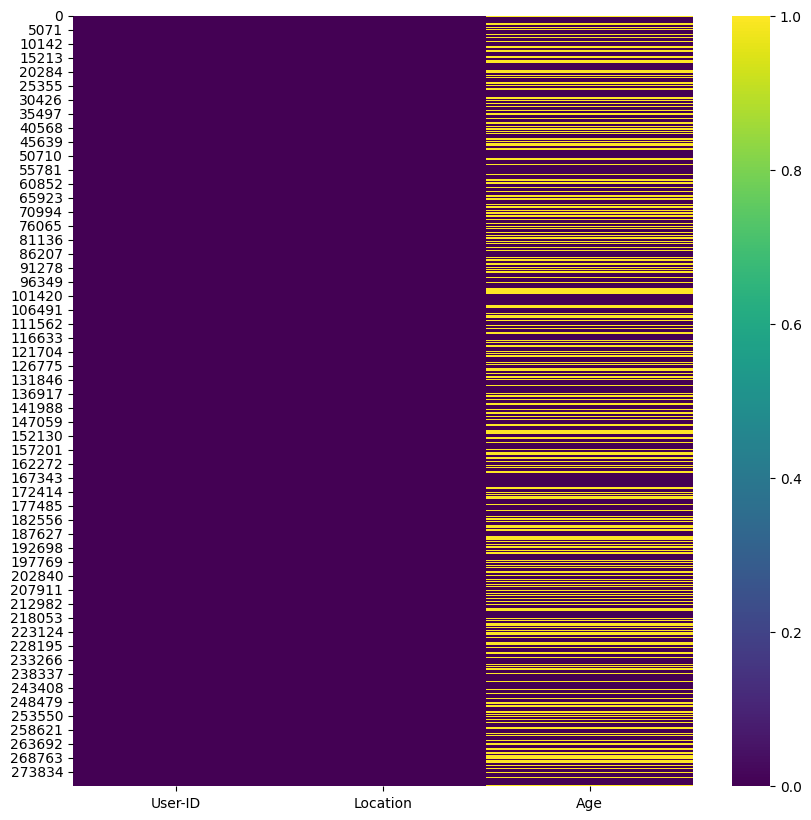

In [359]:
plt.figure(figsize=(10,10))
sns.heatmap(user.isnull(),cmap='viridis')

In [360]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [361]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [362]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [363]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [364]:
print('books =',book.shape)
print('user =',user.shape)
print('ratings =',rating.shape)

books = (271360, 8)
user = (278858, 3)
ratings = (1149780, 3)


In [365]:
#Books data set
book.duplicated().sum()

0

In [366]:
#user data set
user.duplicated().sum()

0

In [367]:
#rating data set
rating.duplicated().sum()

0

In [368]:
#books data set
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [369]:
#user data set
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [370]:
#Rating data set
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [371]:
#No of unique books in the data set
len(book['Book-Title'].unique())

242135

In [372]:
#No of unique author
len(book['Book-Author'].unique())

102024

In [373]:
#Number of unique publishers
len(book['Publisher'].unique())

16808

In [374]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [375]:
user['country']=user['Location'].map(lambda x:x.split(',')[-1])  #Extracting country

In [376]:
user.head()

,User-ID,Location,Age,country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


# merging the data sets

In [377]:
book_rating=book.merge(rating,on='ISBN',how='inner')

In [378]:
final_data=book_rating.merge(user,on='User-ID',how='inner')

EDA


<ipython-input-379-e3f2507a787c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

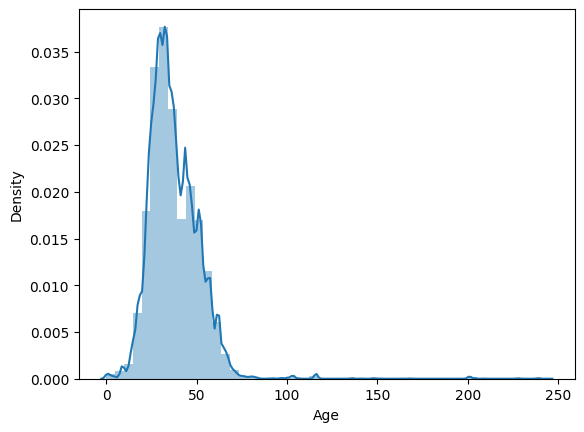

In [379]:
#Distribution plot of age Gives us an idea of majority reader's age
sns.distplot(final_data['Age'])

<Axes: >

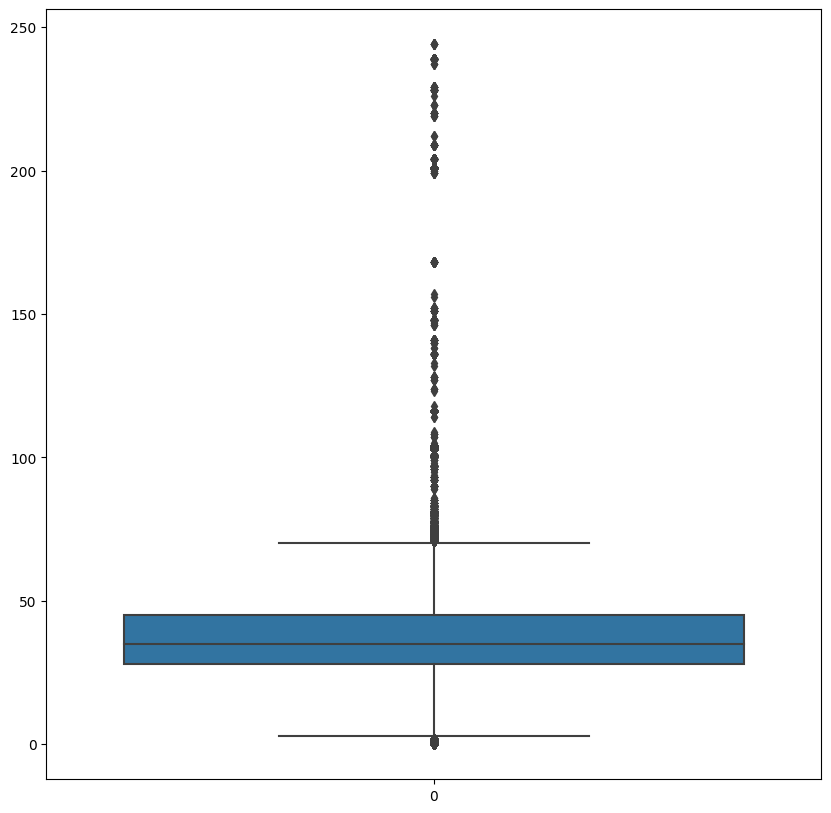

In [380]:
#Box plot for age column
plt.figure(figsize=(10,10))
sns.boxplot(final_data['Age'])

<ipython-input-381-9f36728cf7f0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age['Age'])


<Axes: xlabel='Age', ylabel='Density'>

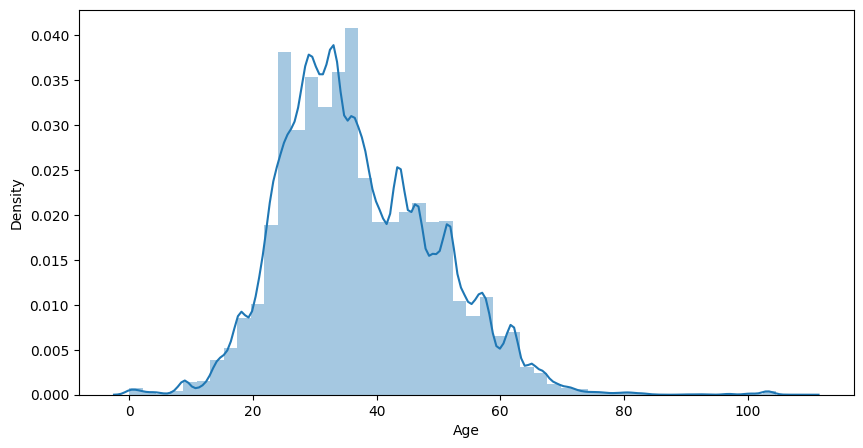

In [381]:
#Distribution plot after removing the outliers
age=final_data[final_data['Age']<110]
plt.figure(figsize=(10,5))
sns.distplot(age['Age'])

In [382]:
#Imputing the age column using mode
final_data['Age']=np.where(final_data['Age']>100,final_data['Age'].mode(),final_data['Age'])

In [383]:
#Filling nan values with mean value
final_data['Age']=final_data['Age'].fillna(int(final_data['Age'].mean()))

In [384]:
final_data.drop(['Image-URL-S','Image-URL-L','Location'],axis=1,inplace=True)

In [385]:
final_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,18.0,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,36.0,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,36.0,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,36.0,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,36.0,canada


<Axes: >

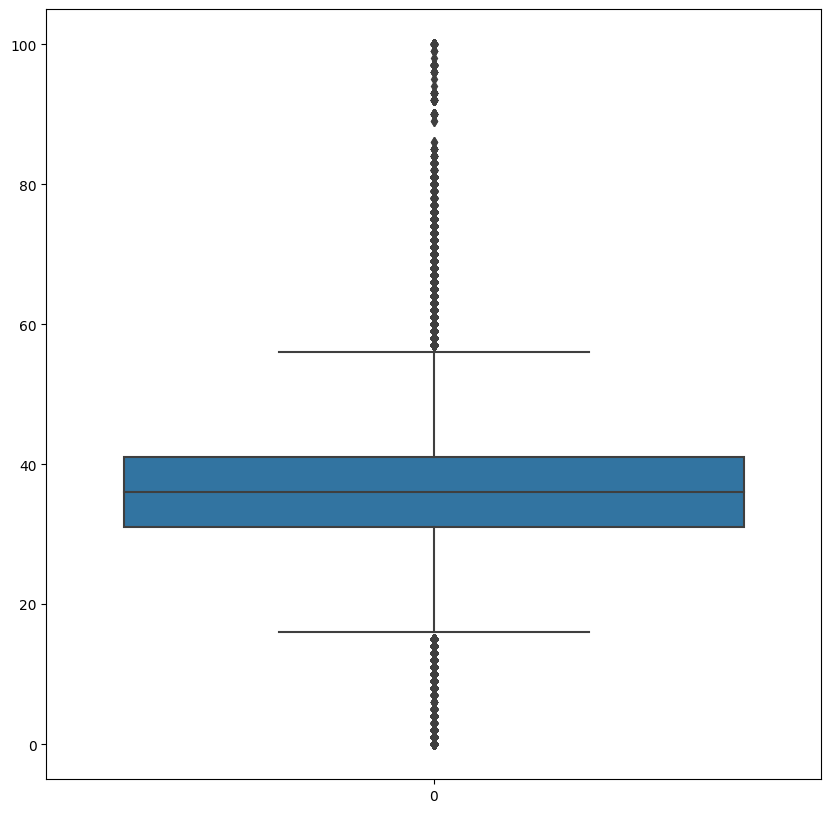

In [386]:
#Box plot for age column
plt.figure(figsize=(10,10))
sns.boxplot(final_data['Age'])

In [387]:
final_data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1992, 1989, 1976, 1985, 1980, 1995, 1997, 1983, 1987, 1990,
       1982, 0, 1965, 1986, 1960, 1974, 1978, 1984, 1973, 1959, 1942,
       1979, 1972, 1981, 1957, 1971, 1963, 1958, 1966, 1930, 1969, 1953,
       1970, 1947, 1977, 1954, 1920, 1955, 1975, 1964, 1967, 2030, 2005,
       1951, 1927, 1961, 1968, 1962, 1948, 1925, 1923, '2002', '1994',
       '1970', '1990', '1998', '1991', '1989', '0', '2001', '1986',
       '1999', '2000', '1996', '1981', '1985', '1987', '1995', '2003',
       '1988', '1976', '1979', '1993', '1984', '1997', '1975', '1983',
       '1992', '1980', '1982', '2004', '1974', '1977', '1971', '1978',
       '1972', '1958', '1969', '1966', '1967', '1973', '1968', 1938, 1956,
       '1964', 1901, 1926, 1940, '1941', '1959', '1942', '1963', '1962',
       '1922', '1957', '1897', '1960', '1949', '1956', '1939', '1955',
       '1961', '1952', '1933', '1954', '1965', '1944', 1952, 2011, 

Here we can observe that there are 2 non year values and also this feature also contain year value greater than current value

In [388]:
#Removing the non year values from the dataset
final_data.drop(final_data[final_data['Year-Of-Publication'] == "DK Publishing Inc"].index, inplace = True)
final_data.drop(final_data[final_data['Year-Of-Publication'] == "Gallimard"].index, inplace = True)
final_data['Year-Of-Publication']=final_data['Year-Of-Publication'].astype(int)

In [389]:
len(final_data.loc[final_data['Year-Of-Publication']>2023])

54

We have 54 values which have year greater than 2023/current year

In [390]:
final_data.drop(final_data[final_data['Year-Of-Publication']>2023].index,inplace=True)
final_data.drop(final_data[final_data['Year-Of-Publication']==0].index,inplace=True)

In [391]:
final_data['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1992, 1989, 1976, 1985, 1980, 1995, 1997, 1983, 1987, 1990,
       1982, 1965, 1986, 1960, 1974, 1978, 1984, 1973, 1959, 1942, 1979,
       1972, 1981, 1957, 1971, 1963, 1958, 1966, 1930, 1969, 1953, 1970,
       1947, 1977, 1954, 1920, 1955, 1975, 1964, 1967, 2005, 1951, 1927,
       1961, 1968, 1962, 1948, 1925, 1923, 1938, 1956, 1901, 1926, 1940,
       1941, 1922, 1897, 1949, 1939, 1952, 1933, 1944, 2011, 1937, 1902,
       1950, 1911, 1943, 1945, 1946, 1932, 1924, 1921, 1936, 2021, 1900,
       1929, 2020, 2006, 1909, 2010, 1931, 1906, 1935, 1806, 1928, 1934,
       1910, 1378, 2012, 2008, 1917, 1914, 1904, 1376, 1908, 1919])

Now the year of publication is only having valid years

In [392]:
final_data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-M            0
User-ID                0
Book-Rating            0
Age                    0
country                0
dtype: int64

In [393]:
#Creating to separate data frame to find the number of rating  & the average rating that each book has got
df1=pd.DataFrame()
df2=pd.DataFrame()
df1=final_data.groupby('Book-Title').count()['Book-Rating'].reset_index()
df1.rename(columns={'Book-Rating':'Number of Rating'},inplace=True)
df2=final_data.groupby('Book-Title').mean()['Book-Rating'].reset_index()
df2.rename(columns={'Book-Rating':'Average Rating'},inplace=True)

<ipython-input-393-1b1a245239b4>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=final_data.groupby('Book-Title').mean()['Book-Rating'].reset_index()


In [394]:
#Merging the 2 data set
data=df1.merge(df2,on='Book-Title')

To get author details. we have to merge data with book

In [395]:
#Merging the book data set to the data inorder to get author and publication details
df3=data.merge(book,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Number of Rating','Average Rating','Year-Of-Publication']]

In [396]:
#Top 25 books based on the number of rating and the average ratings of the book
df3[df3['Number of Rating']>250].sort_values('Average Rating',ascending=False).reset_index().head(25)

,index,Book-Title,Book-Author,Image-URL-M,Number of Rating,Average Rating,Year-Of-Publication
0,88540,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804,1999
1,88522,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289,2000
2,88550,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410,1998
3,88527,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441,2003
4,88512,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453,2000
5,211536,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117,1986
6,206679,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370,1986
7,88557,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652,1999
8,234105,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769,1986
9,243360,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000,1988


In [397]:
disp=df3[df3['Number of Rating']>250].sort_values('Average Rating',ascending=False).reset_index().head(20)

Text(0.5, 1.0, 'Top 20 books v/s Average ratings')

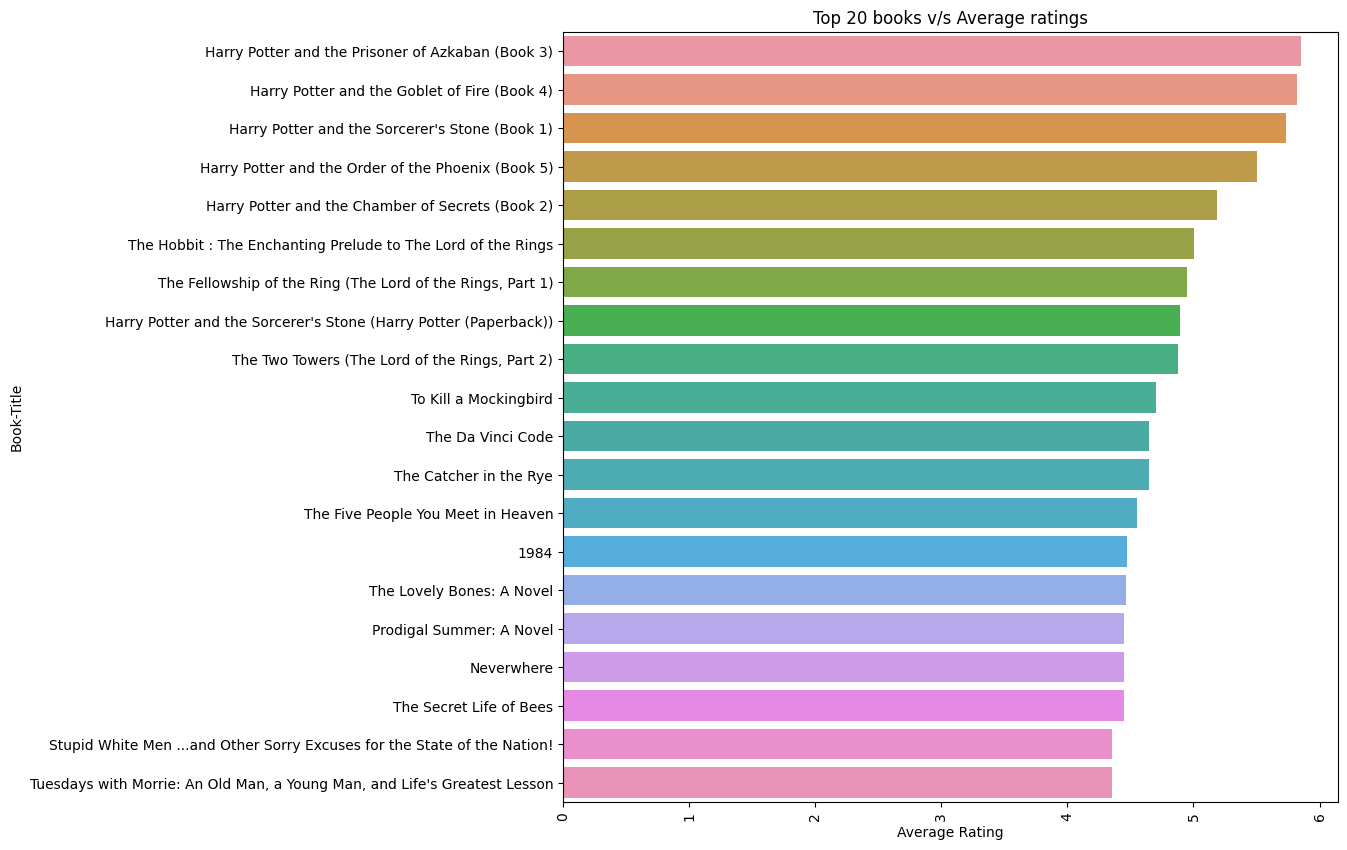

In [398]:
#top 20 average ratings vs books
plt.figure(figsize=(10,10))
sns.barplot(y='Book-Title',x='Average Rating',data=disp)
plt.xticks(rotation=90)
plt.title('Top 20 books v/s Average ratings')

Text(0.5, 1.0, 'Number of ratings  V/S Books')

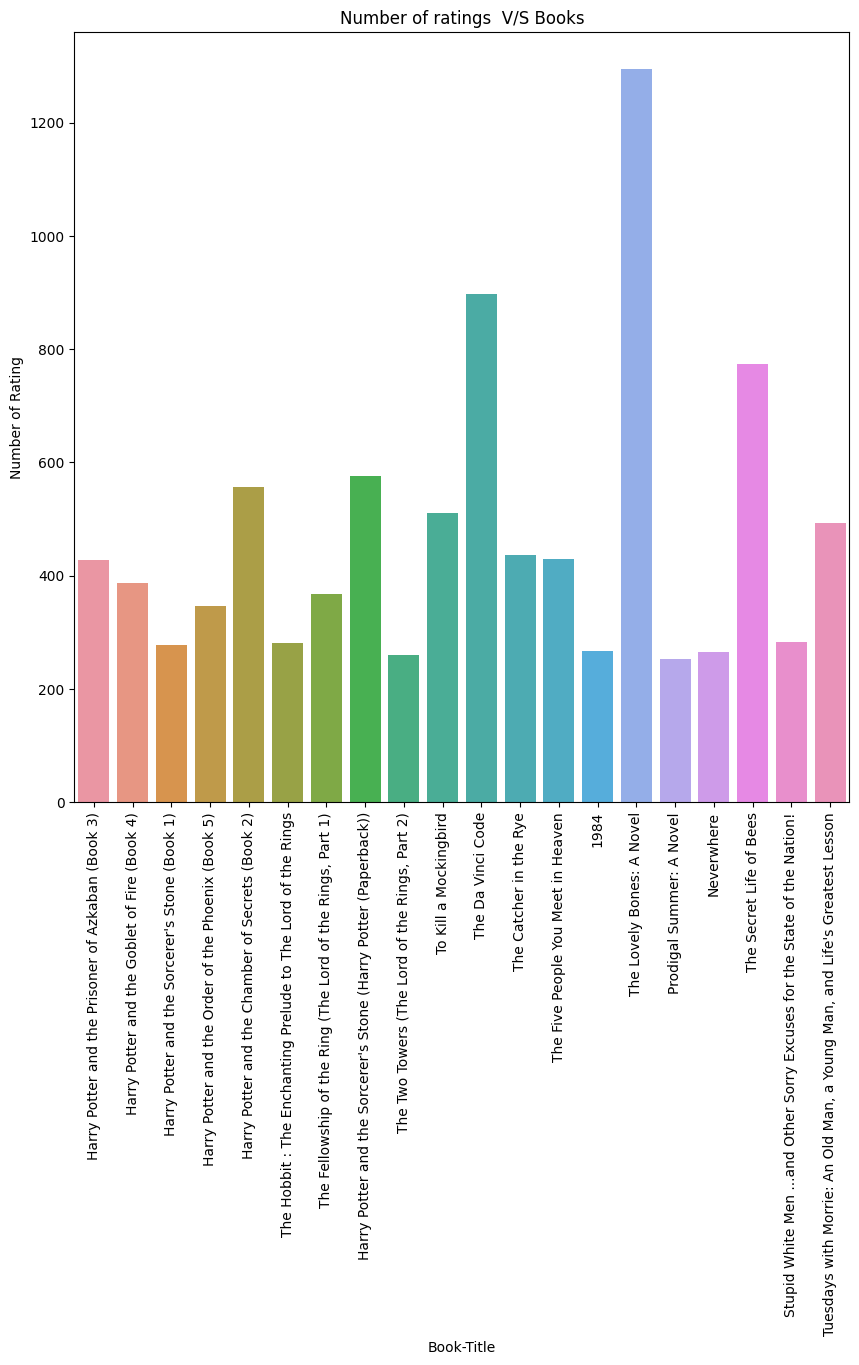

In [399]:
#To find the most popular books or best sellers
plt.figure(figsize=(10,10))
sns.barplot(x='Book-Title',y='Number of Rating',data=disp)
plt.xticks(rotation=90)
plt.title('Number of ratings  V/S Books')

In [400]:
#Popular author and their book based on the number of ratings
df3[df3['Number of Rating']>500].sort_values('Number of Rating',ascending=False)

,Book-Title,Book-Author,Image-URL-M,Number of Rating,Average Rating,Year-Of-Publication
259948,Wild Animus,Rich Shapero,http://images.amazon.com/images/P/0971880107.0...,2502,1.019584,2004
216975,The Lovely Bones: A Novel,Alice Sebold,http://images.amazon.com/images/P/0316666343.0...,1295,4.468726,2002
202378,The Da Vinci Code,Dan Brown,http://images.amazon.com/images/P/0385504209.0...,897,4.647715,2003
5751,A Painted House,John Grisham,http://images.amazon.com/images/P/044023722X.0...,838,3.231504,2001
220250,The Nanny Diaries: A Novel,Emma McLaughlin,http://images.amazon.com/images/P/0312278586.0...,828,3.530193,2002
30921,Bridget Jones's Diary,Helen Fielding,http://images.amazon.com/images/P/0330332775.0...,815,3.527607,1997
228526,The Secret Life of Bees,Sue Monk Kidd,http://images.amazon.com/images/P/0142001740.0...,774,4.447028,2003
58271,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,http://images.amazon.com/images/P/0060928336.0...,740,3.437838,1997
226087,The Red Tent (Bestselling Backlist),Anita Diamant,http://images.amazon.com/images/P/0312195516.0...,723,4.334716,1998
15870,Angels &amp; Demons,Dan Brown,http://images.amazon.com/images/P/0671027360.0...,670,3.708955,2001


country wise plot

In [401]:
#To find the number of reader who has made a review country wise
country_count=final_data.groupby('country').count()['Book-Rating'].reset_index()
country_count.rename(columns={'Book-Rating':'Number of ratings'},inplace=True)

In [402]:
#Setting min number of rating to 20 inorder to remove all insignificant country names
active_user=country_count[country_count['Number of ratings']>20].sort_values('Number of ratings',ascending=False).reset_index()
active_user.head(10)

,index,country,Number of ratings
0,267,usa,742010
1,41,canada,91868
2,255,united kingdom,30564
3,91,germany,26523
4,0,,23966
5,16,australia,17167
6,218,spain,14678
7,159,n/a,10947
8,85,france,9688
9,189,portugal,6805


In [403]:
#Removing the data that is having country with n/a and null value
active_user.drop(active_user[active_user['country']==''].index,inplace=True)
active_user.drop(active_user[active_user['Number of ratings']==10947].index,inplace=True)
active_user.drop(['index'],axis=1,inplace=True)       #Removing index column

In [404]:
#Table show Number of ratings  based on country
active_user.head(10)

,country,Number of ratings
0,usa,742010
1,canada,91868
2,united kingdom,30564
3,germany,26523
5,australia,17167
6,spain,14678
8,france,9688
9,portugal,6805
10,new zealand,5288
11,malaysia,5022


Text(0.5, 1.0, 'Number of reader vs Country')

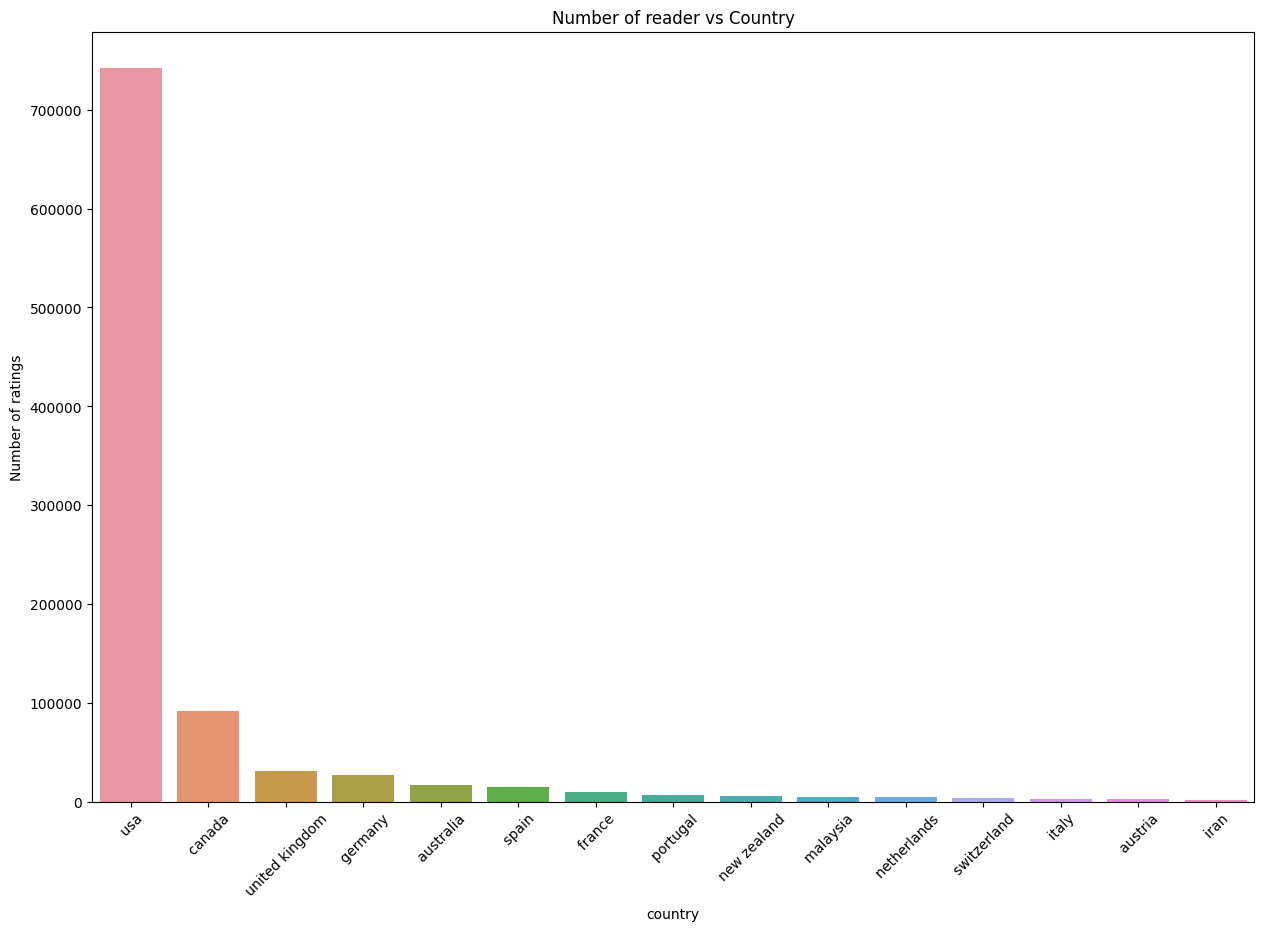

In [405]:
#Extracting Number of Active reader based country
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.barplot(x='country',y='Number of ratings',data=active_user.head(15))
plt.title('Number of reader vs Country')

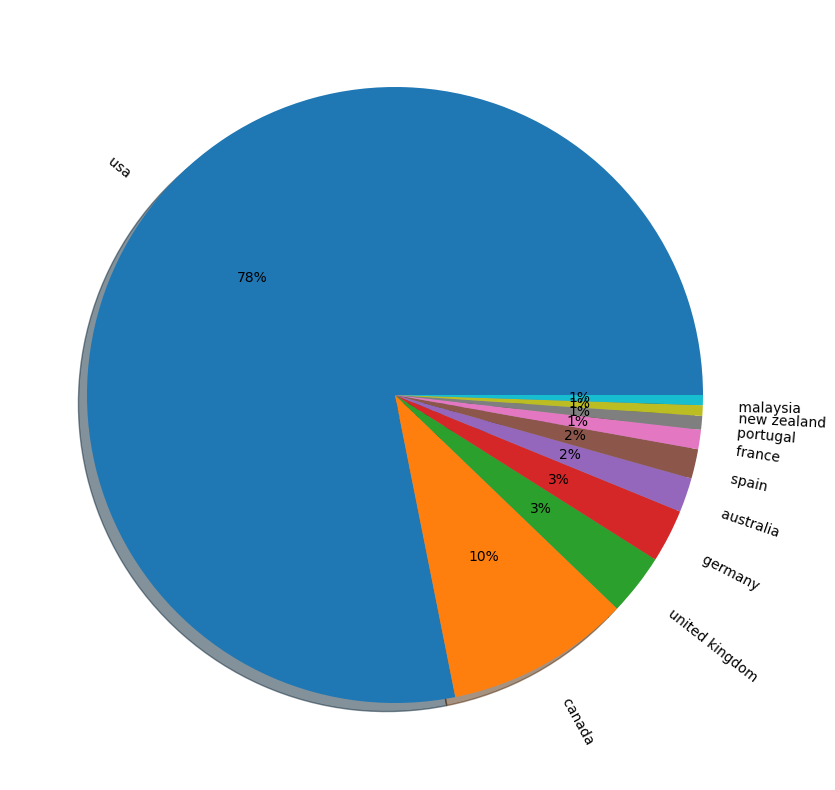

In [406]:
#Top 10 countries Based on active users
plt.figure(figsize=(10,10))
plt.pie(active_user['Number of ratings'].head(10), labels=active_user['country'].head(10),autopct='%.0f%%',shadow=True, rotatelabels='true')
plt.show()

In [407]:
#Top get the popular publisher based on the number of ratings
popular_publisher=final_data.groupby('Publisher').count()['Book-Rating'].reset_index().sort_values('Book-Rating',ascending=False)
popular_publisher.rename(columns={'Book-Rating':'Number of ratings'},inplace=True)  #Renaming the column to number of ratings
popular_publisher.head(10)  #Top 10 popular publishers

,Publisher,Number of ratings
1360,Ballantine Books,34697
11437,Pocket,31922
1682,Berkley Publishing Group,28609
15469,Warner Books,25471
6407,Harlequin,25027
1390,Bantam Books,23574
1386,Bantam,20001
13269,Signet Book,19152
1221,Avon,17351
11075,Penguin Books,17027


Text(0.5, 1.0, 'Popular Publishers')

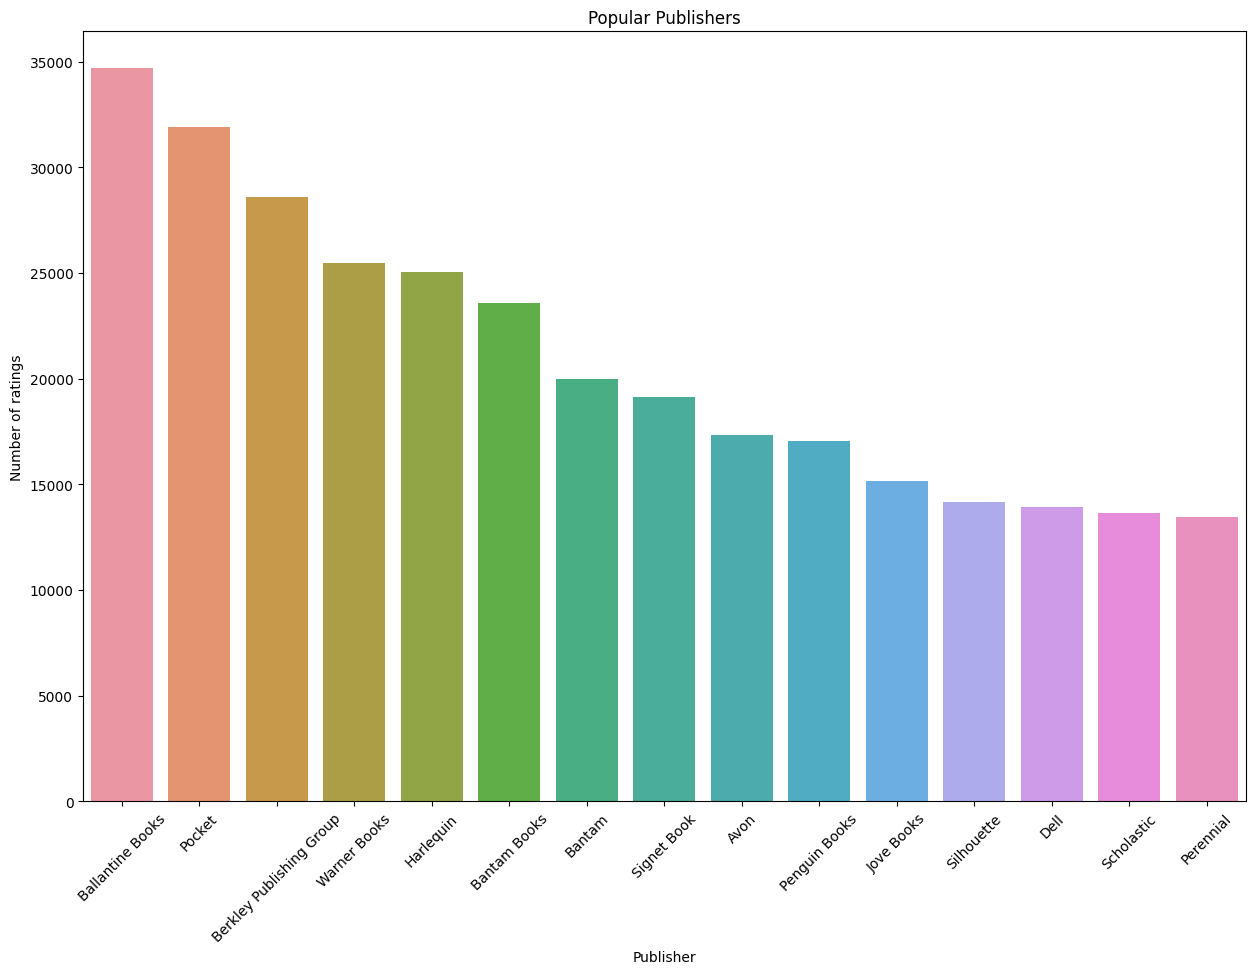

In [408]:
#Popular publisher based on the number of ratings
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.barplot(x='Publisher',y='Number of ratings',data=popular_publisher.head(15))
plt.title('Popular Publishers')

In [409]:
#Top get the popular Author based on the number of ratings
count=final_data.groupby('Book-Author').count()['Book-Rating'].reset_index().sort_values('Book-Rating',ascending=False) #To get number of ratings count
count.rename(columns={'Book-Rating':'Number of ratings'},inplace=True)                                                  #Renaming the column
mean=final_data.groupby('Book-Author').mean()['Book-Rating'].reset_index().sort_values('Book-Rating',ascending=False)   #To get average of rating
mean.rename(columns={'Book-Rating':'Average-Rating'},inplace=True)
popular_author=count.merge(mean,on='Book-Author')                                                                       #Merging the 2 table
popular_author.head()

<ipython-input-409-f0223fa5c3fc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean=final_data.groupby('Book-Author').mean()['Book-Rating'].reset_index().sort_values('Book-Rating',ascending=False)   #To get average of rating


,Book-Author,Number of ratings,Average-Rating
0,Stephen King,9967,3.610515
1,Nora Roberts,8427,2.660021
2,John Grisham,5958,3.191172
3,James Patterson,5839,3.145402
4,Mary Higgins Clark,4768,2.631292


In [410]:
#Updating the data set by selecting only author which has min 1500 rating
popular_author=popular_author[popular_author['Number of ratings']>1500].sort_values('Average-Rating',ascending=False)

Text(0.5, 1.0, 'Top 15 popular authors')

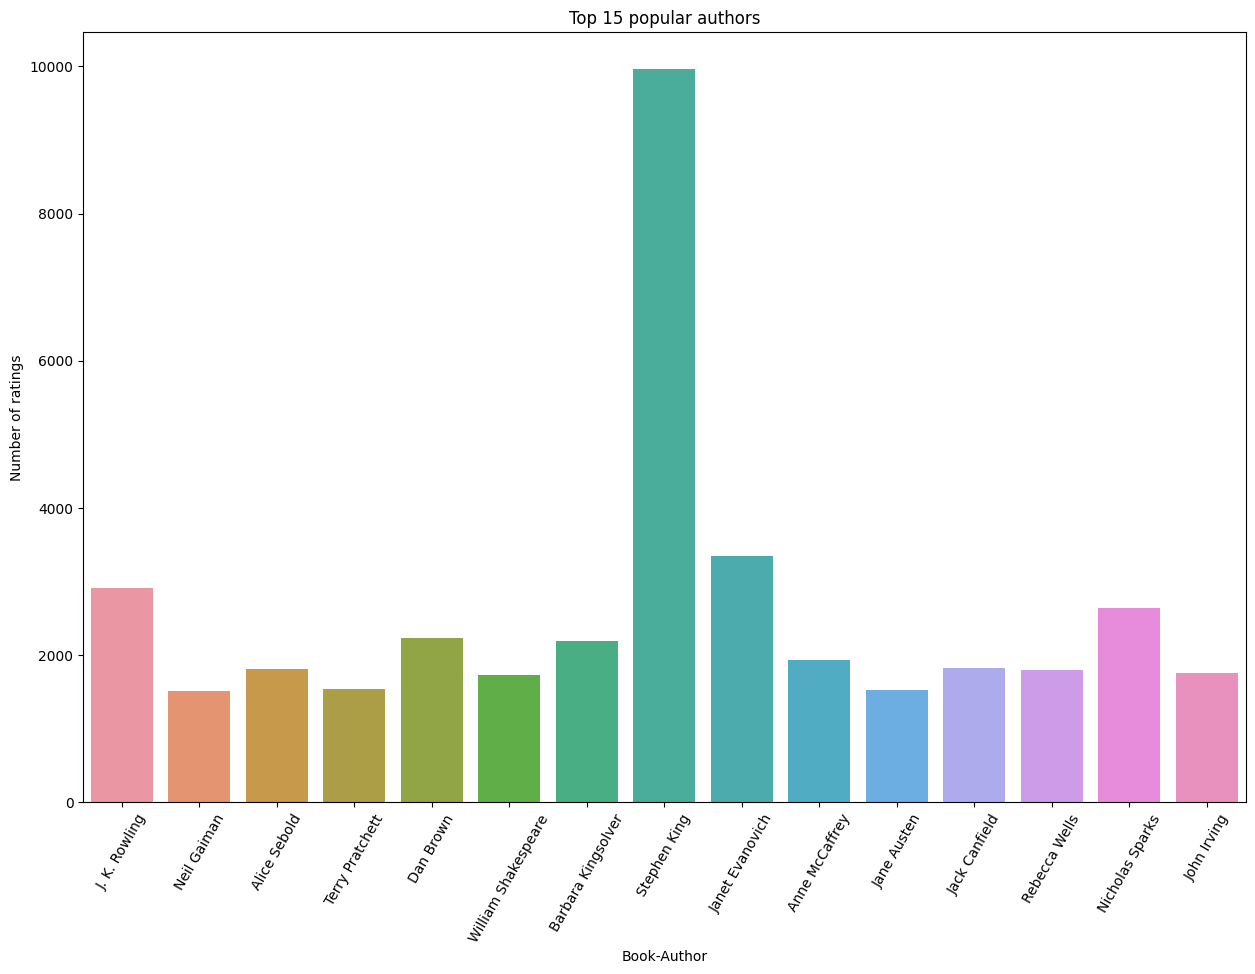

In [411]:
#Popular author based on the number of ratings
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.barplot(x='Book-Author',y='Number of ratings',data=popular_author.head(15))
plt.title('Top 15 popular authors')

In [412]:
popular_author.head(10)

,Book-Author,Number of ratings,Average-Rating
12,J. K. Rowling,2908,5.385832
46,Neil Gaiman,1509,4.500994
35,Alice Sebold,1806,4.198782
42,Terry Pratchett,1545,4.192233
23,Dan Brown,2227,4.023799
41,William Shakespeare,1730,3.928902
25,Barbara Kingsolver,2190,3.718721
0,Stephen King,9967,3.610515
9,Janet Evanovich,3346,3.535565
32,Anne McCaffrey,1932,3.513458


In [ ]:
#Creating a separate data for weighted average
data=final_data.copy()
data['average_rating']=data.groupby('Book-Title')['Book-Rating'].transform('mean')   #Creating r for the equation
data['no_of_ratings']=data.groupby('Book-Title')['Book-Rating'].transform('count')   #Creating v for the equation

# Model building

#Popularity based recommendation - Weighted Rating model

Fromula for calculating weighted average

W=(Rv+cm)/(v+m) W=weighted rating R=average rating of a particular book v=Number of reviews/voting made for each book m=minimum number of voting required for consider the book for recommendation c=mean of all the average rating

In [ ]:
v=data['no_of_ratings']
R=data['average_rating']
c=data['average_rating'].mean()
m=150    #Set min number of votes

In [ ]:
c

In [ ]:
#Creating a table which hold's a weighted average
data['weighted_average']=((R*v)+(c*m))/(v+m)

In [ ]:
#Removing all the duplicate book title from the data
popular_books=data.sort_values('weighted_average',ascending=False).drop_duplicates('Book-Title').reset_index()

In [ ]:
#These are the top 20 recommendation based on weighted average
pk=popular_books

In [ ]:
pk.drop(['Image-URL-M','index'],axis=1).head(25)

# Evaluation

In [ ]:
!pip install scikit-surprise


In [ ]:
from surprise import SVD,Dataset,Reader,NMF
from surprise.model_selection import cross_validate,train_test_split,GridSearchCV

In [ ]:
u1=user.merge(rating,on='User-ID')
final=u1.merge(book,on='ISBN')

In [ ]:
data=final[['User-ID','Book-Title','Book-Rating']]
df=data.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['User-ID','Book-Title','Book-Rating']], reader)

In [313]:
model= SVD()
cv_results_svd = cross_validate(model, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse     3.511919
test_mae      2.934130
fit_time     27.952158
test_time     5.390072
dtype: float64

In [314]:
#SVD model
X,y=train_test_split(data,test_size=0.25)
model=SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(X)
pred=model.test(y)
#prediction
df_pred = pd.DataFrame(pred, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred.drop('details',axis=1,inplace=True)
df_pred['pred_rating']=df_pred['pred_rating'].round()
df_pred[df_pred['user_id']==98391]

,user_id,isbn,actual_rating,pred_rating
448,98391,Arch Angels : A Joe Keough Mystery (Joe Keough...,8.0,8.0
454,98391,Ninja Soccer Moms,10.0,8.0
735,98391,The Sleeper : A Novel,9.0,8.0
855,98391,What She Wants,8.0,7.0
913,98391,The Prince Of Beverly Hills,10.0,8.0
...,...,...,...,...
256850,98391,"The Madman's Tale (Katzenbach, John)",10.0,8.0
257146,98391,Whirlwind Wedding (Historical),10.0,8.0
257360,98391,Scarlet Woman (Arabesque S.),9.0,8.0
257396,98391,Mojo: Conjure Stories,8.0,8.0


# Collaborative filtering Based Recommender system

Here data of user's who have read & gave rating for 150. books will be consider. and in the case of book min 50 people should have read the book and must should have given the ratings.

item based filtering

In [315]:
x=final_data.groupby('User-ID').count()['Book-Rating']>150      #Considering only user who have read & reviewed more than 150 books
active_readers=x[x].index #Give list of data which satisfies the above conditions

In [316]:
filtered_df=final_data[final_data['User-ID'].isin(active_readers)]
filtered_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,country
80,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8,36.0,n/a
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9,36.0,n/a
82,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,11676,8,36.0,n/a
83,0771074670,Nights Below Station Street,David Adams Richards,1988,Emblem Editions,http://images.amazon.com/images/P/0771074670.0...,11676,0,36.0,n/a
84,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,11676,9,36.0,n/a


In [317]:
y=filtered_df.groupby('Book-Title').count()['Book-Rating']>50     #applying filter condition on book title
good_books=y[y].index #List of books which is having more than 50 ratings
filtered_df2=filtered_df[filtered_df['Book-Title'].isin(good_books)]
filtered_df2

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,country
81,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9,36.0,n/a
84,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,11676,9,36.0,n/a
85,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,11676,8,36.0,n/a
88,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,11676,6,36.0,n/a
89,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,11676,0,36.0,n/a
...,...,...,...,...,...,...,...,...,...,...
918734,0440201926,Kaleidoscope,Danielle Steel,1988,Dell,http://images.amazon.com/images/P/0440201926.0...,247958,10,44.0,usa
918736,0446353957,Mirror Image,Sandra Brown,1990,Warner Books,http://images.amazon.com/images/P/0446353957.0...,247958,0,44.0,usa
918740,0671741195,The Cradle Will Fall,Mary Higgins Clark,1991,Pocket,http://images.amazon.com/images/P/0671741195.0...,247958,0,44.0,usa
918745,155166674X,Between Friends,Debbie Macomber,2003,Mira Books,http://images.amazon.com/images/P/155166674X.0...,247958,0,44.0,usa


In [318]:
#Creating pivot table
pivot=filtered_df2.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pivot

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [319]:
#Filling the nan value with 0
pivot.fillna(0,inplace=True)
pivot

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [320]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_score=cosine_similarity(pivot)         #Compare each book with other books and find similar book
similarity_score.shape

(839, 839)

In [321]:
similarity_score

array([[1.        , 0.08202874, 0.01002098, ..., 0.09928384, 0.06628141,
        0.03648583],
       [0.08202874, 1.        , 0.25233692, ..., 0.06000464, 0.14873547,
        0.1435961 ],
       [0.01002098, 0.25233692, 1.        , ..., 0.03769791, 0.04493654,
        0.09205667],
       ...,
       [0.09928384, 0.06000464, 0.03769791, ..., 1.        , 0.06439035,
        0.01670749],
       [0.06628141, 0.14873547, 0.04493654, ..., 0.06439035, 1.        ,
        0.09936127],
       [0.03648583, 0.1435961 , 0.09205667, ..., 0.01670749, 0.09936127,
        1.        ]])

In [322]:
pivot.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=839)

Based on book name

In [323]:
#Defining a function which would take a book name and returns suggesion based on the book
def recommender(book_name):
  index=np.where(pivot.index==book_name)[0][0]
  similar_items=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]

  for i in similar_items:
    print(pivot.index[i[0]])

In [324]:
recommender('You Belong To Me')

Exclusive
I'll Be Seeing You
Weep No More My Lady
Loves Music, Loves to Dance
All Around the Town


In [325]:
recommender('All Around the Town')

You Belong To Me
Daddy's Little Girl
Let Me Call You Sweetheart
Exclusive
I'll Be Seeing You


# Knn Clustering model

In [326]:
user.head()

,User-ID,Location,Age,country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [327]:
#Selecting user only if they have made min of 200 reviews
x=rating['User-ID'].value_counts()>200
y=x[x].index #to get all the true value boolean indexing and gives the user id

In [328]:
rating=rating[rating['User-ID'].isin(y)]
rating.shape

(526356, 3)

In [329]:
#merging the book and rating data set
df1=rating.merge(book,on='ISBN')
df1.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [330]:
#Filtering the data based on the books
num_rating=df1.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating.rename(columns={'Book-Rating':'number of ratings'},inplace=True)
final_rating=df1.merge(num_rating,on='Book-Title')
final_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,number of ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82


In [331]:
#Selecting only is the number of ratings is greater than 50
final_rating=final_rating[final_rating['number of ratings']>=50]
final_rating.shape  #This is data which books with min 50 ratings

(61853, 11)

In [332]:
#Deleting records of people who have rated the same book multiple times
final_rating.drop_duplicates(['Book-Title','User-ID'],inplace=True)
final_rating.shape

<ipython-input-332-aa3800f1844f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rating.drop_duplicates(['Book-Title','User-ID'],inplace=True)


(59850, 11)

In [333]:
#Creating pivot table
book_pivot=final_rating.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
print(book_pivot.shape)   #There are total 742 books and 888 user got filter for suggestion list
book_pivot.fillna(0,inplace=True)

(742, 888)


In [334]:
book_pivot.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [335]:
#we will be using nearest neighbour clustering algorithm
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
book_sparse=csr_matrix(book_pivot)  #To consider only value and to avoid 0 to reduce computation time
#Building the model
model=NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [336]:
#The model take's the movie name then also number of suggestion required
distance,suggestion=model.kneighbors(book_pivot.iloc[240,:].values.reshape(1,-1),n_neighbors=6)

In [337]:
suggestion

array([[240, 238, 237, 241, 239, 184]])

In [338]:
book_pivot.index[237]

'Harry Potter and the Chamber of Secrets (Book 2)'

In [339]:
suggestion_names=[]

In [340]:
for i in range(len(suggestion)):
    suggestion_names.extend(book_pivot.index[suggestion[i]])

In [341]:
suggestion_names[1]

'Harry Potter and the Goblet of Fire (Book 4)'

In [342]:
#Input
def recommend_book(book_name):
  id=np.where(book_pivot.index==book_name)[0][0]
  distance,suggestion=model.kneighbors(book_pivot.iloc[id,:].values.reshape(1,-1),n_neighbors=6)
  name=[]
  for i in range(len(suggestion)):
    name.extend(book_pivot.index[suggestion[i]])
    return name

In [343]:
recommend_book("Animal Farm")

['Animal Farm',
 'Exclusive',
 'Jacob Have I Loved',
 'Second Nature',
 'Pleading Guilty',
 'No Safe Place']

In [344]:
recommend_book("Harry Potter and the Prisoner of Azkaban (Book 3)")

['Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Harry Potter and the Goblet of Fire (Book 4)',
 'Harry Potter and the Chamber of Secrets (Book 2)',
 "Harry Potter and the Sorcerer's Stone (Book 1)",
 'Harry Potter and the Order of the Phoenix (Book 5)',
 'Exclusive']

User based recommendation

In [345]:
#Creating pivot table
user_pivot=final_rating.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')
user_pivot


Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Cry In The Night,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,0.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
277427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [346]:
user_pivot.fillna(0,inplace=True)
user_pivot.head()

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Cry In The Night,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [347]:
#Calculating cosin similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [348]:
user_based_pivot=final_rating.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')
user_based_pivot.fillna(0,inplace=True)
#Give the distance between users, min distance indicate that user's have similar taste
user_similarity=1-pairwise_distances(user_based_pivot.values,metric='cosine')
user_similar_df=pd.DataFrame(user_similarity)
user_id_list=final_rating['User-ID'].unique()    #To get all user id
#Setting the index and columns to user id
user_similar_df.index=final_rating['User-ID'].unique()
user_similar_df.columns=final_rating['User-ID'].unique()
#Filling the diagonal value with 0
np.fill_diagonal(user_similarity,0)
def user_based_recommender(user_id):
    #Input from customer and finding the similar member id
    user1=user_similar_df[user_similar_df.index==user_id]
    temp=user1.idxmax(axis=1)
    k1=int(temp)
#creating data frame for the above 2 id(input and similar id)
    user_in=final_rating[final_rating['User-ID']==user_id]
    user_sim=final_rating[final_rating['User-ID']==k1]
#Merging the 2 data frame on outer join
    suggest_df=pd.merge(user_sim,user_in,on='Book-Title',how='outer')
    #Selecting only book with min 5 rating
    temp_df=suggest_df[(suggest_df['Book-Rating_x']>5)]    #data frame to store suggestion table
    #Filling all the nan values with null,inorder to apply filter in the next stage
    temp_df=temp_df.fillna('Null')
    #Filtering so that only book which are not read by the user will be suggested
    temp_df=temp_df[temp_df['User-ID_y']=='Null']
#Sorting based on decreasing order of rating made by similar user and taking the first 5 book if exist
    book_list=temp_df.sort_values('Book-Rating_x',ascending=False).head(5)
    #book_author=book_list['Book-Author_x'].values
    book_list=book_list['Book-Title'].values
    book_list=list(book_list)
    return book_list

In [349]:
user_based_recommender(2766)

['Good Omens',
 'WLD ACCORDNG GARP',
 'Degree of Guilt',
 'Fahrenheit 451',
 'The Empty Chair']

In [350]:
user_based_recommender(278418)

['The Eight',
 'SHIPPING NEWS',
 'Fahrenheit 451',
 'The Other Boleyn Girl',
 'White Teeth: A Novel']

In [351]:
result=final_data[final_data['User-ID']==31826].sort_values('Book-Rating',ascending=False)
result[result['Book-Rating']>5]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,country
217803,0439316340,I Spy Year-Round Challenger! A Book of Picture...,Jean Marzollo,2001,Scholastic,http://images.amazon.com/images/P/0439316340.0...,31826,10,54.0,usa
217832,0878578129,The Healing Foods: The Ultimate Authority on t...,Patricia Hausman,1989,St Martins Pr,http://images.amazon.com/images/P/0878578129.0...,31826,10,54.0,usa
217844,0895776162,"Our Glorious Century/Key Events, Pictures, Pla...",Reader's Digest,1994,Readers Digest,http://images.amazon.com/images/P/0895776162.0...,31826,10,54.0,usa
217843,006105531X,A Diversity of Dragons (Pern),Anne McCaffrey,1997,Eos,http://images.amazon.com/images/P/006105531X.0...,31826,10,54.0,usa
217842,0831716762,Concise Illustrated Book of Seashells,Solene T. Morris,1990,Smithmark Publishers,http://images.amazon.com/images/P/0831716762.0...,31826,10,54.0,usa
...,...,...,...,...,...,...,...,...,...,...
217932,0590294024,The Case of the Rock &amp; Roll Mystery (The N...,Lisa Eisenberg,1998,Scholastic,http://images.amazon.com/images/P/0590294024.0...,31826,7,54.0,usa
217509,0671042858,The Girl Who Loved Tom Gordon,Stephen King,2000,Pocket,http://images.amazon.com/images/P/0671042858.0...,31826,7,54.0,usa
217933,0938753770,"That's the Way It Crumbles, Cookie",Suzanne Weyn,1993,Parachute Publishing,http://images.amazon.com/images/P/0938753770.0...,31826,7,54.0,usa
218099,0761502483,Branson With Kids: The Definitive Family Guide...,Toni Eugene,1996,Prima Lifestyles,http://images.amazon.com/images/P/0761502483.0...,31826,6,54.0,usa


Author based recommendation

In [352]:
rating=pd.read_csv('Ratings.csv')
#Merging the data
df_author=user.merge(rating,on='User-ID')
df_author=df_author.merge(book,on='ISBN')
df_author['Average_rating']=df_author.groupby('Book-Title')['Book-Rating'].transform('mean')
df_author['Number_of_rating']=df_author.groupby('Book-Title')['Book-Rating'].transform('count')
#Minimum number of vote
v=df_author['Number_of_rating']
R=df_author['Average_rating']
c=df_author['Average_rating'].mean()
m=200    #Set min number of votes
df_author['weighted_average']=((R*v)+(c*m))/(v+m)
df_author.drop(['Age','Location','Image-URL-S','Image-URL-M'],axis=1,inplace=True)
df_author.drop_duplicates('Book-Title',inplace=True)
df_author=df_author.sort_values('weighted_average',ascending=False)



def author_based_recommender11(author_name):

    selected_df=df_author[df_author['Book-Author']==author_name]
    selected_df=selected_df.drop_duplicates('Book-Title')
    book_list=selected_df['Book-Title'].values
    book_list=list(book_list)
    return book_list

In [353]:
author_based_recommender11('Harper Lee')

['To Kill a Mockingbird',
 'To Kill a Mockingbird : The 40th Anniversary Edition of the Pulitzer Prize-Winning Novel',
 'Wer die Nachtigall stÃ?Â¶rt.',
 'TO KILL A MOCKINGBIRD - HHP EDT',
 'Matar Un Ruisenor',
 'Matar UN Ruisenor',
 'New Windmills: To Kill a Mockingbird (New Windmills)',
 "To kill a mockingbird (The World's best reading)"]

In [354]:
author_based_recommender11('Lisa Eisenberg')

['The Case of the Disappearing Princess (The New Adventures of Mary-Kate &amp; Ashley)',
 'The Case of the Rock &amp; Roll Mystery (The New Adventures of Mary-Kate &amp; Ashley)',
 '101 Rock and Roll Jokes and Riddles',
 'Baseball Bloopers',
 'The Wacky Family Survival Guide',
 'Brain Builders... Not!',
 'The Story of Sitting Bull: Great Sioux Chief (Dell Yearling Biography)',
 'One Hundred and One Ghost Jokes',
 '101 Bug Jokes',
 '101 Back to School Jokes',
 '101 School Jokes',
 '101 Hopelessly Hilarious Jokes']